In [1]:
import pandas as pd
df = pd.read_csv('airbnb_europe.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [2]:
df.shape

(41714, 19)

In [3]:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

<h3> Data Analysis </h3>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

<h4> 1. Rental Prices based on Cities and Day of the Week </h4>

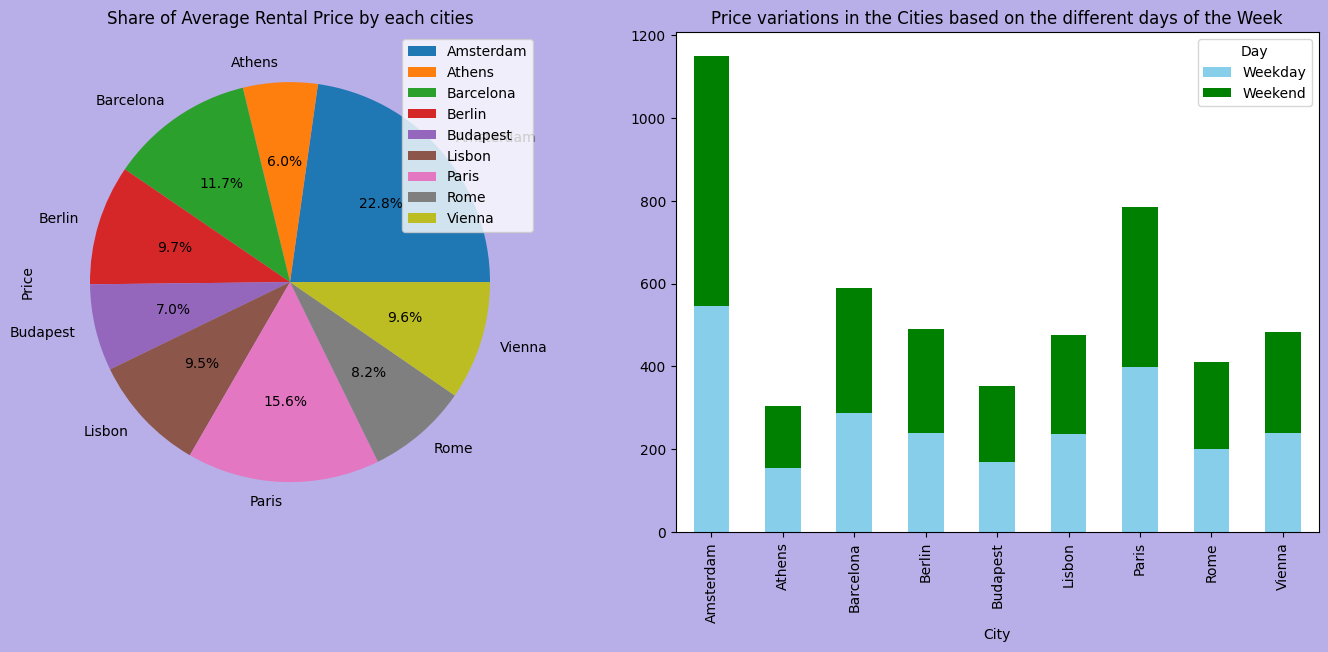

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(45,10),gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1]})
fig.set_facecolor('#B8AEE8')

# Plot the first subplot
city_avg_price = df.groupby('City')['Price'].mean().reset_index()
city_avg_price.plot(kind = 'pie',y='Price',labels = city_avg_price['City'],autopct = '%.1f%%',ax=axs[0])
axs[0].set_title('Share of Average Rental Price by each cities')


city_price = df.pivot_table(index='City',columns='Day',values='Price')
city_price.plot(kind='bar', stacked=True,color=['skyblue', 'green'],ax=axs[1])
axs[1].set_title('Price variations in the Cities based on the different days of the Week')

plt.subplots_adjust(left=0.6, bottom=0.5, right=0.9, top=1, wspace=0.1, hspace=1)

<h4> 2. Cleanliness of the Hotels in different cities </h4>

In [6]:
more_than_7 = df.loc[df['Cleanliness Rating']>7]['City'].value_counts().reset_index().rename(columns={'City':'>7_count'})
less_than_7 = df.loc[df['Cleanliness Rating']<7]['City'].value_counts().reset_index().rename(columns={'City':'<7_count'})
all_count = df['City'].value_counts().reset_index().rename(columns={'City':'all_count'})

In [7]:
merged_df = pd.merge(all_count, more_than_7, on='index')
merged_df = pd.merge(merged_df, less_than_7, on='index')
merged_df['more_percent'] = (merged_df['>7_count']/merged_df['all_count'])*100
merged_df['less_percent'] = (merged_df['<7_count']/merged_df['all_count'])*100

Text(0.5, 1.0, 'Relative percentage of Cities with less number of UnClean Hotels')

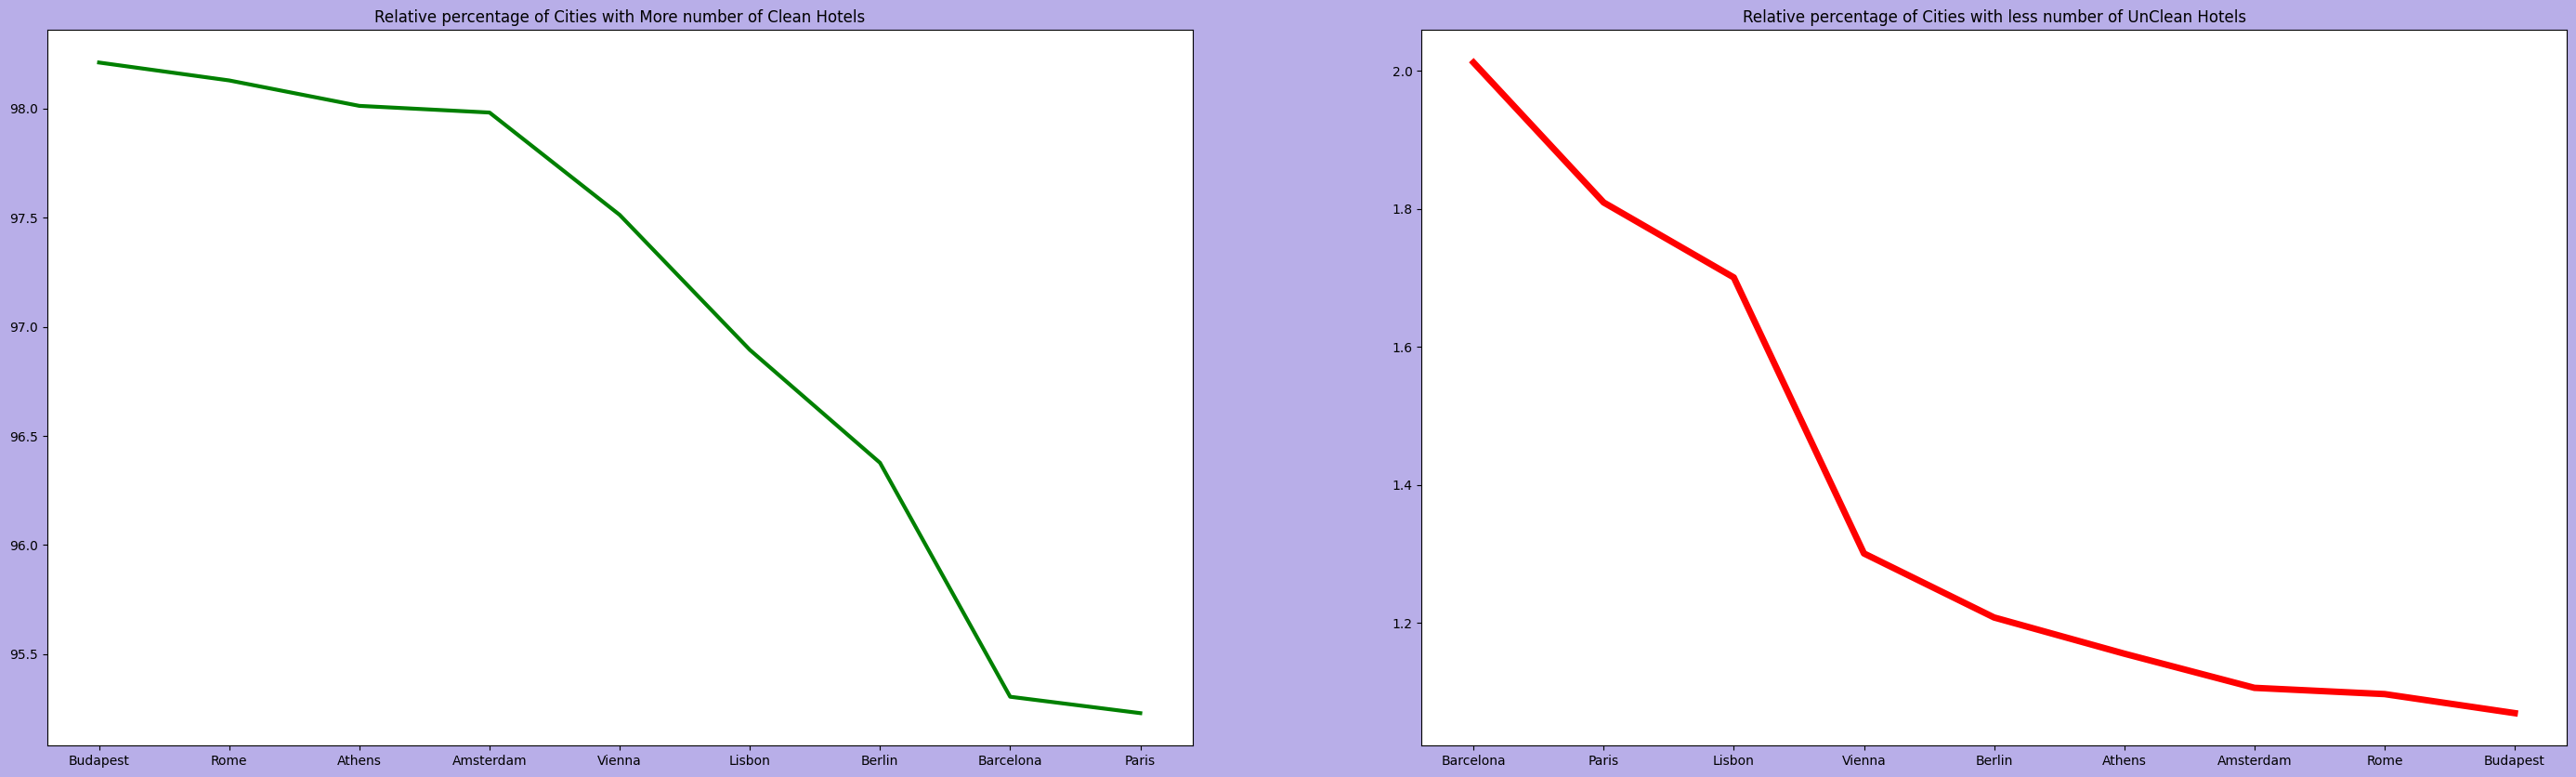

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(35,10),gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1]})
fig.set_facecolor('#B8AEE8')

sort_more = merged_df.sort_values(by='more_percent', ascending=False)
axs[0].plot(sort_more['index'],sort_more['more_percent'], color = 'green', linewidth = '3')
axs[0].set_title('Relative percentage of Cities with More number of Clean Hotels')

sort_less = merged_df.sort_values(by='less_percent', ascending=False)
axs[1].plot(sort_less['index'],sort_less['less_percent'], color = 'red',linewidth = '5')
axs[1].set_title('Relative percentage of Cities with less number of UnClean Hotels')

<h4> 3. Availability of different room types in various cities </h4>

Text(45.09146918402779, 0.5, 'Room counts')

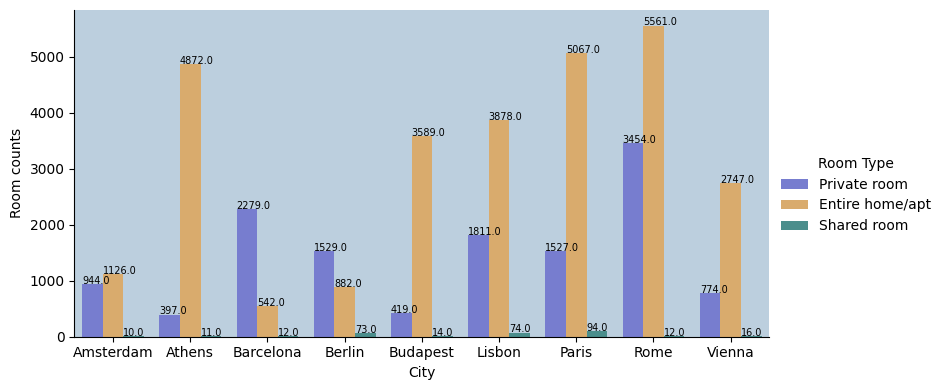

In [9]:
ax = sns.catplot(x='City', hue = 'Room Type',data= df, kind='count',height=4, aspect=2,palette = ['#6870DE','#EBAD5B','#409996', '#60C3E0', '#F65074','#8ACF77', '#D2D22C'])

ax.ax.set_facecolor('#BCCFDE')
for p in ax.ax.patches:
    ax.ax.annotate(f'{p.get_height()}', (p.get_x(), p.get_height()+2), fontsize=7)
    
plt.ylabel('Room counts')

<h4> 4. Price with Distance from City centers </h4>

Text(37.722222222222214, 0.5, 'Price (Euro)')

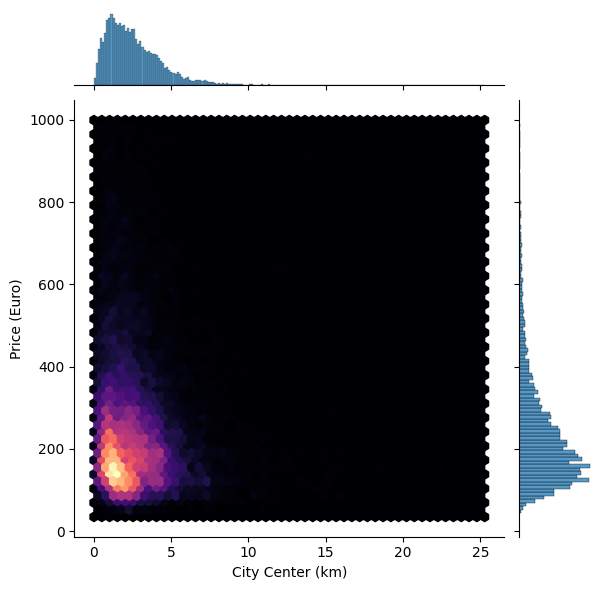

In [10]:
pr_df  = df.loc[df['Price']<1000,['Price','City Center (km)']]
sns.jointplot(x=pr_df['City Center (km)'], y=pr_df.Price,kind="hex", cmap="magma")
plt.ylabel('Price (Euro)')

<h4> 5. Attraction and Restaurant Index </h4>

In [11]:
city_index = df.pivot_table(index='City',values=['Normalised Attraction Index','Normalised Restraunt Index']).reset_index().rename(columns={'Normalised Attraction Index':'NAI','Normalised Restraunt Index':'NRI'})
city_index

,City,NAI,NRI
0,Amsterdam,14.246499,26.097566
1,Athens,5.740839,9.954268
2,Barcelona,16.636220,19.376528
3,Berlin,16.803111,30.666967
4,Budapest,12.675248,34.529089
5,Lisbon,7.324730,28.274084
6,Paris,18.204358,42.589111
7,Rome,10.426968,25.078056
8,Vienna,8.762474,4.239580


Text(0, 0.5, 'Average_Index')

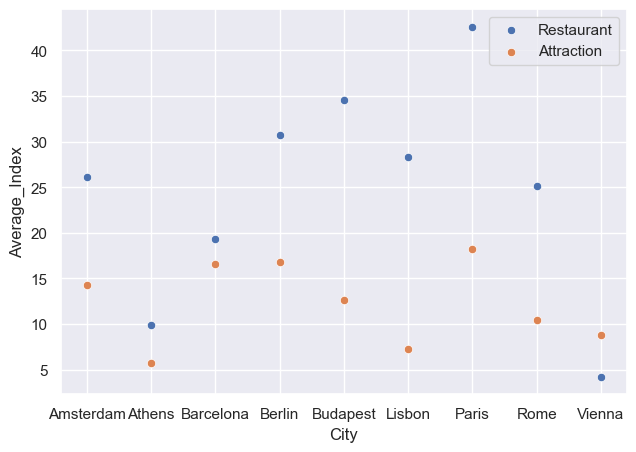

In [12]:
sns.set(rc={'figure.figsize':(7.3,5)})
sns.scatterplot(x='City',y='NRI',data=city_index, label='Restaurant')
sns.scatterplot(x='City',y='NAI',data=city_index,label='Attraction')
plt.legend()
plt.ylabel('Average_Index')

<h4> 6. Number of Bedrooms vs Capacity  </h4>

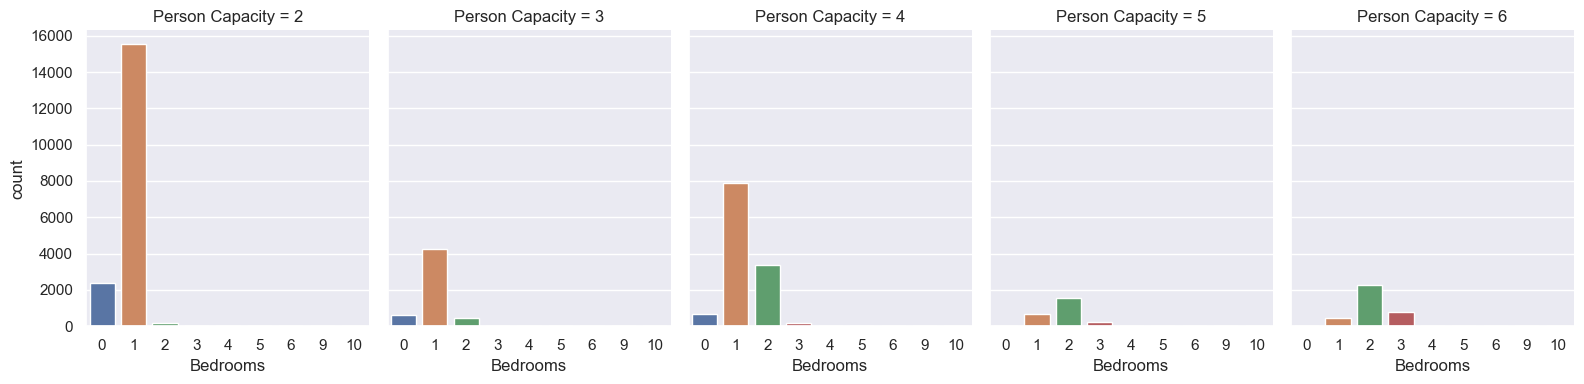

In [13]:
sns.catplot(x="Bedrooms", col="Person Capacity",data= df, kind="count",height=4, aspect=0.8)

<h4> 7. Avg.Price of different Bedroom numbers</h4>

<Axes: ylabel='Price'>

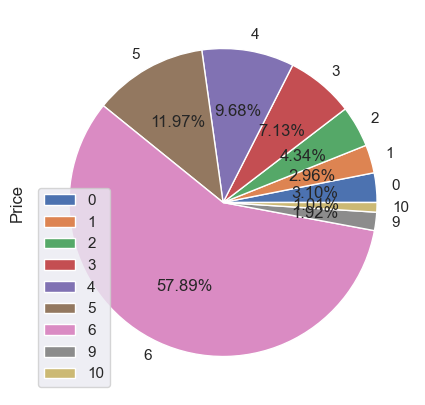

In [14]:
bed_df = df.groupby('Bedrooms')['Price'].mean().reset_index()
bed_df.plot(kind = 'pie',y='Price', labels = bed_df['Bedrooms'], autopct = '%1.2f%%')

<h3> Outliers </h3>

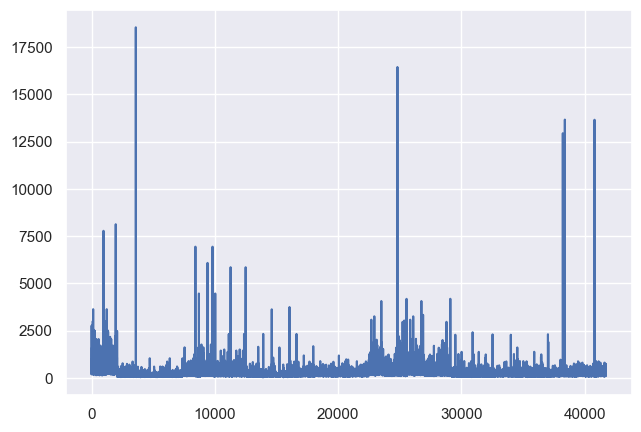

In [15]:
plt.plot(df['Price'])

In [16]:
df.loc[df['Price']>3000].shape

(32, 19)

In [17]:
df = df.drop(index=df[df['Price']>3000].index)

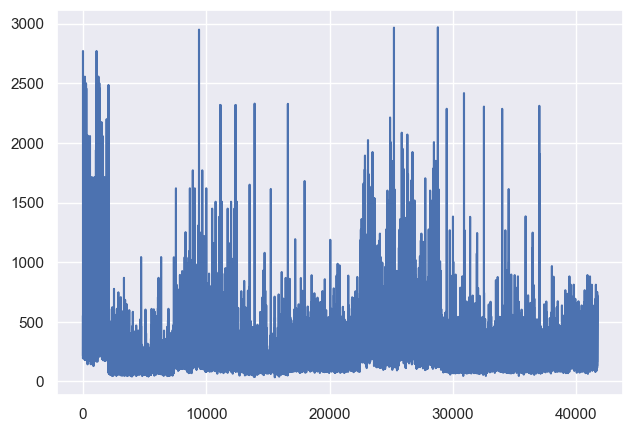

In [18]:
plt.plot(df['Price'])

<h3> Data Modelling </h3>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
drop_columns = ['Shared Room', 'Private Room', 'Superhost', 'Multiple Rooms', 'Business', 'Attraction Index', 'Restraunt Index']

In [21]:
df = df.drop(columns=drop_columns)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41682 entries, 0 to 41713
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41682 non-null  object 
 1   Price                        41682 non-null  float64
 2   Day                          41682 non-null  object 
 3   Room Type                    41682 non-null  object 
 4   Person Capacity              41682 non-null  int64  
 5   Cleanliness Rating           41682 non-null  int64  
 6   Guest Satisfaction           41682 non-null  int64  
 7   Bedrooms                     41682 non-null  int64  
 8   City Center (km)             41682 non-null  float64
 9   Metro Distance (km)          41682 non-null  float64
 10  Normalised Attraction Index  41682 non-null  float64
 11  Normalised Restraunt Index   41682 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 4.1+ MB


In [23]:
y = df['Price']
X = df.drop(['Price'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
num_x = X.select_dtypes("number").columns
cat_x = X.select_dtypes("object").columns

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
numeric_features = Pipeline(steps=[('scaling', StandardScaler(with_mean=True)),('norm',Normalizer(norm='l1'))])
categorical_features=Pipeline(steps=[('encoding',OneHotEncoder()),('scaling',StandardScaler(with_mean=False)),('norm',Normalizer(norm='l1'))])

processing = ColumnTransformer([('numeric',numeric_features,num_x),('cat',categorical_features,cat_x)])

In [28]:
X_input = processing.fit_transform(X_train)

In [29]:
X_test = processing.transform(X_test)

<h3> 1. Linear Regression </h3>

In [30]:
linear_model = LinearRegression()
linear_model.fit(X_input,y_train)

LinearRegression()

In [31]:
lin_mse = mean_squared_error(y_test, linear_model.predict(X_test))
lin_r2 = r2_score(y_test, linear_model.predict(X_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(lin_mse))
print("The r-squared error (r2) on test set: {:.4f}".format(lin_r2))

The mean squared error (MSE) on test set: 20038.8171
The r-squared error (r2) on test set: 0.4757


<h3> 2. Ensemble </h3>

In [32]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
ensemble_model = ensemble.GradientBoostingRegressor(**params)

In [33]:
ensemble_model.fit(X_input, y_train)

ensemble_mse = mean_squared_error(y_test, ensemble_model.predict(X_test))
ensemble_r2 = r2_score(y_test, ensemble_model.predict(X_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(ensemble_mse))
print("The r-squared error (r2) on test set: {:.4f}".format(ensemble_r2))

The mean squared error (MSE) on test set: 14344.5115
The r-squared error (r2) on test set: 0.6247


<h3> 3. Decision Tree Regressor </h3>

In [34]:
tree_model = DecisionTreeRegressor(max_depth=2)
tree_model.fit(X_input, y_train)

DecisionTreeRegressor(max_depth=2)

In [35]:
tree_model_mse = mean_squared_error(y_test, tree_model.predict(X_test))
tree_model_r2 = r2_score(y_test, tree_model.predict(X_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(tree_model_mse))
print("The r-squared error (r2) on test set: {:.4f}".format(tree_model_r2))

The mean squared error (MSE) on test set: 27050.1558
The r-squared error (r2) on test set: 0.2923


<h3> Testing </h3>

In [36]:
import numpy as np
y_act = np.array(y_test.to_list())


tree_prediction = tree_model.predict(X_test)
linear_prediction = linear_model.predict(X_test)
ensemble_prediction = ensemble_model.predict(X_test)

test_df = pd.DataFrame(tree_prediction, columns=['Tree_Prediction'])
test_df['Linear_Prediction'] = linear_prediction
test_df['Ensemble_Prediction'] = ensemble_prediction
test_df['Actual'] = y_act
test_df['Avg'] = (test_df['Tree_Prediction']+test_df['Linear_Prediction']+test_df['Ensemble_Prediction'])/3

In [37]:
test_df[12:20]

,Tree_Prediction,Linear_Prediction,Ensemble_Prediction,Actual,Avg
12,217.592157,522.0,374.247754,277.693155,371.279970
13,217.592157,334.0,310.182822,152.157703,287.258326
14,217.592157,268.0,225.118775,231.762473,236.903644
15,217.592157,228.0,219.652027,225.903967,221.748061
16,416.069551,494.5,563.811380,452.045857,491.460310
17,217.592157,73.5,123.523364,100.766293,138.205174
18,217.592157,261.5,259.363058,276.576345,246.151739
19,217.592157,264.0,245.928240,154.015144,242.506799


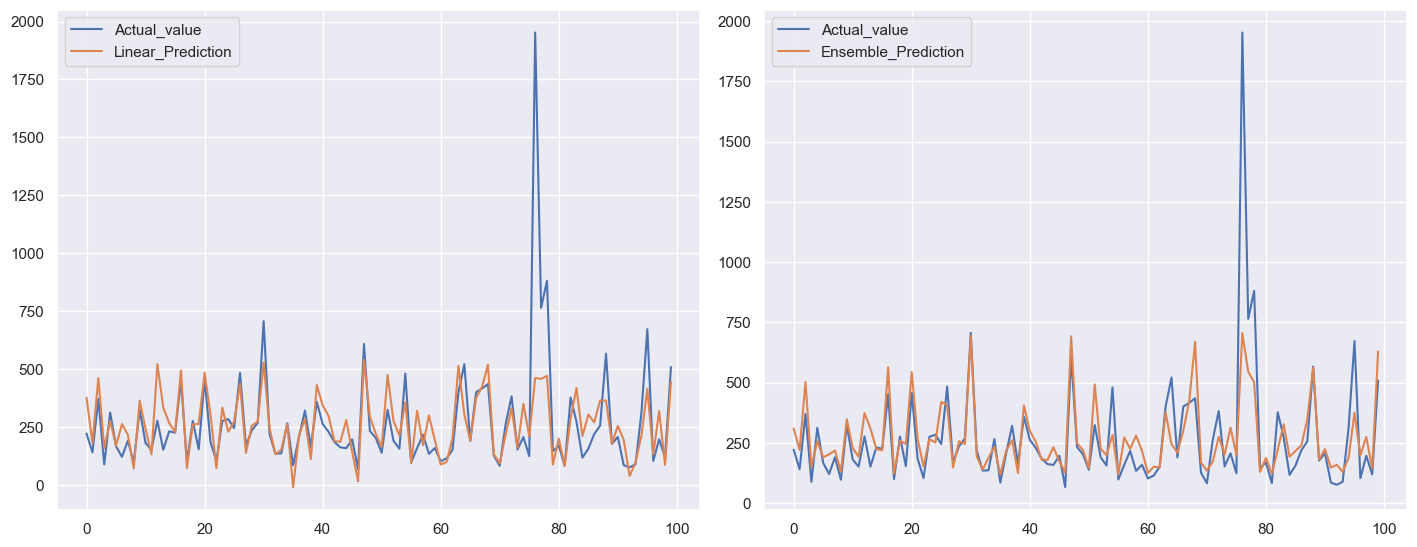

In [38]:
plt.figure(figsize=(45,10))

plt.subplot(1,2,1)
plt.plot(y_act[:100], label='Actual_value')
plt.plot(linear_prediction[:100], label='Linear_Prediction')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_act[:100], label='Actual_value')
plt.plot(ensemble_prediction[:100], label='Ensemble_Prediction')
plt.legend()
plt.subplots_adjust(left=0.6, bottom=0.5, right=0.9, top=1, wspace=0.1, hspace=1)

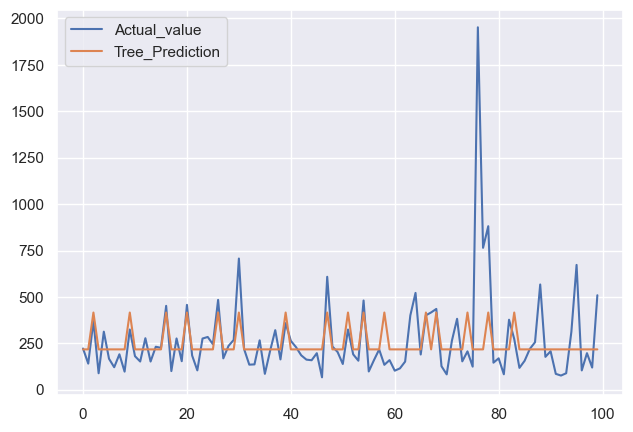

In [39]:
plt.plot(y_act[:100], label='Actual_value')
plt.plot(tree_prediction[:100], label='Tree_Prediction')
plt.legend()